In [1]:
#import cupy as cp
import sys
sys.path.append("../../scripts")
from auxiliar.save import save_psf

#import cupy as cp
import cupy as cp
from astropy.io import fits
from astropy.utils.data import download_file
from matplotlib import pyplot as plt
import cv2
from matplotlib import pyplot as plt


In [43]:
def psf_real(size_figure,url):
    image_link = download_file(url, cache=True )
    image = fits.getdata(image_link).astype(cp.float32)
    image = cp.reshape(image,[image.shape[2],image.shape[3]]) 
    image = cv2.resize(cp.asnumpy(image), dsize=(size_figure,size_figure), interpolation=cv2.INTER_CUBIC)
    psf = cp.array(image)
    #save_psf(path,TYPE_PSF,cp.asnumpy(psf))
    return psf

def radius(image):  
        value = cp.max(psf)/2
        image = image > value
        idx,idy = 0,0
        minX = SIZE_FIGURE-1
        maxX = 0
        for row in image:
            for px in row:
                if (px and idx < minX):
                    minX = idx
                if (px and idx > maxX):
                    maxX = idx
                idx = idx+1
            idx = 0
            idy = idy+1
        idx,idy = 0,0
        minY = SIZE_FIGURE-1
        maxY = 0
        for row in image:
            for px in row:
                if (px and idy < minY):
                    minY = idy
                if (px and idy > maxY):
                    maxY = idy
                idx = idx+1
            idx = 0
            idy = idy+1
        Vx=maxX-minX +1
        Vy=maxY-minY +1
        return Vx,Vy

def psf_gauss(tam,sigmX,sigmY):
    x, y = cp.meshgrid(cp.linspace(-1,1,tam), cp.linspace(-1,1,tam))
    ux,uy = 0,0
    
    exp = (((x-ux)**2/(2*sigmX)) + ((y-uy)**2/(2*sigmY)))
    gauss = cp.exp(exp)
    return cp.asnumpy(gauss)
    
def view(image):
    plt.imshow(cp.asnumpy(image))
    

(28, 28)
<class 'numpy.ndarray'>


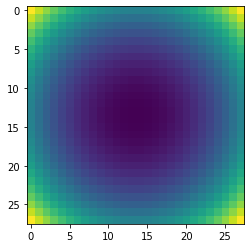

In [44]:
URL = 'https://github.com/nicolasalarconl/InterferometryDeepLearning/blob/main/4_hd142_128x128_08.psf.fits?raw=true'
SIZE_FIGURE = 28
psf = psf_real(SIZE_FIGURE,URL)
view(psf)

psf  = psf_gauss(28,2,2)
view(psf)
print(psf.shape)
print(type(psf))


In [59]:
data = psf # np.array([[1, 2, 5, 91, 27], [5, 41, 80, 66, 52], [56, 101, 122, 115, 9], [21, 55, 81, 5, 7], [90, 22, 37, 24, 2]])
amp = np.max(data)
ypix, xpix = psf[psf == amp]
x_range = np.take(data, ypix[0], axis=0)
print(x_range)
y_range = np.take(data, xpix[0], axis=1)
print(y_range)

half_max = amp/2.0
d_x = x_range - half_max
d_y = y_range - half_max
indices_x = np.where(d_x>0)[0]
indices_y = np.where(d_y>0)[0]

# FMHM in x and y - simply counts how many pixels are within half the max in both directions
width_x = len(indices_x)
width_y = len(indices_y)

ValueError: too many values to unpack (expected 2)

28
28


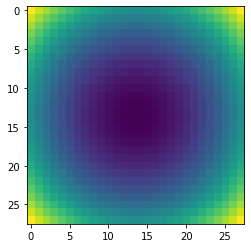

In [50]:
dx,dy = radius(psf)
print(dx)
print(dy)
ps = psf_gauss(SIZE_FIGURE,dx,dy)
view(ps)

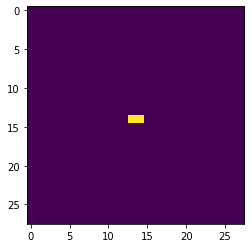

In [28]:
value = cp.max(psf)/2
psf = psf > value
view(psf)